# Importando Bibliotecas

In [18]:
library(corrgram)
library(repr)
options(repr.plot.width= 4, repr.plot.height= 4)
library(caret)

# Dados

In [2]:
df = read.csv("../datasets/CarPrice.csv")
head(df)
dim(df)

car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
6,2,audi fox,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250


[1] 205  26

## Correlações possíveis

- Altura e largura do carro
- Tamanho do Motor
- Potência do Motor à cavalo

# Cáculo da correlação entre X e Y

In [9]:
cor(df['enginesize'], df['price'])

,price
enginesize,0.8741448


## Criar o modelo de Regressão

- O método **fit** treina o modelo com os dados fornecidos

In [10]:
modelo = lm(price ~ enginesize, data=df)
modelo


Call:
lm(formula = price ~ enginesize, data = df)

Coefficients:
(Intercept)   enginesize  
    -8005.4        167.7  


## Coeficientes

- O atributo **coefficients** armazena um vetor com os coeficientes
- Na primeira posição armazena o termo independente no modelo linear **intercept**.
- Na segunda posiçao armazena os coeficientes estimados para o problema de regressão linear (inclinação da reta)
- A função **sumary** com o atributo **r.squared** contém o coeficente de determinação

In [11]:
modelo$coefficients[1]
modelo$coefficients[2]
summary(modelo)$r.squared

(Intercept) 
  -8005.446

enginesize 
  167.6984

[1] 0.7641291

## Prever um valor

- Existem duas formas de prever um valor, a primeira é formulando a equação com os coeficientes
- Outra forma de prever é usando o método **predict** passando uma Matriz como argumento

In [12]:
y = modelo$coefficients[1] + modelo$coefficients[2] * 130
y

(Intercept) 
   13795.35

In [13]:
predict(modelo, data.frame(enginesize = 130))

1 
13795.35

## Grafico com Regressão

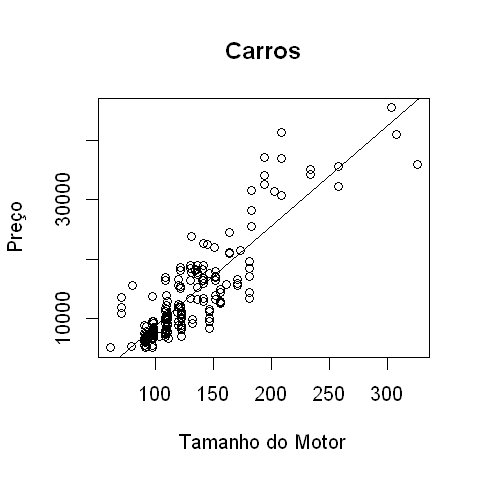

In [14]:
plot(price ~ enginesize, data= df,ylab="Preço", xlab="Tamanho do Motor", main="Carros")
abline(modelo)

## Regressão Linear Múltipla

In [15]:
modelo = lm(price ~ enginesize + horsepower, data=df)
predict(modelo, data.frame(enginesize = 130, horsepower = 111))

1 
14060.44

# Validação Cruzada

- **method = cv** - indica que iremos usar o método crossvalidation
- **number = 10** - define o número de fold
- **method = lm** - indica que iremos usar o algorítmo de Regressão Linear

In [20]:
controle_treinamento = trainControl(method = 'cv', number = 10)
modelo = train(price ~ enginesize + horsepower, data = df, trControl = controle_treinamento, method = 'lm')
modelo$results

intercept,RMSE,Rsquared,MAE,RMSESD,RsquaredSD,MAESD
TRUE,3632.874,0.7746473,2626.286,791.9574,0.1379589,517.3037
